### Mini batch

In [82]:
import numpy as np
import matplotlib.pyplot as plt

from dataclasses import dataclass

@dataclass 
class Param:
    n =  60000
    p = 28*28
    eps  = 0.5
    lr = None
    epochs = None

x = np.random.randn(Param.n,Param.p)
w = np.random.randn(Param.p)
e = np.random.randn(Param.n)
y = np.dot(x,w) + Param.eps * e

In [83]:
w_hat = np.zeros(Param.p)

def pred(x,w_hat):
    return np.dot(x,w_hat)
def loss(w_hat):
    return ((y - pred(x, w_hat)) ** 2).mean()
def grad(w_hat,idx=range(x.shape[0])):
    return np.dot(x[idx,:].T, pred(x[idx,:],w_hat)-y[idx])/len(idx)

def gradient_descent(w_hat):
    return w_hat - Param.lr * grad(w_hat)
def mini_batch_gradient_descent(w_hat,bs):
    shuffle = np.random.permutation(Param.n)
    for i in range(0,Param.n,bs):
        idx = shuffle[i:i+bs]
        w_hat = w_hat - Param.lr * grad(w_hat,idx)
    return w_hat
def stochastic_gradient_descent(w_hat):
    shuffle = np.random.permutation(Param.n)
    for i in shuffle:
        w_hat = w_hat - Param.lr * grad(w_hat,[i])
    return w_hat

def update(batch_size):
    return lambda x:mini_batch_gradient_descent(x,batch_size)

In [96]:
from tqdm.notebook import tqdm

def train(w_hat, update):
    w_hat = np.zeros(Param.p)
    para_history = []
    loss_history = []
    para_history.append(w_hat)
    loss_history.append(loss(w_hat))
    for i in range(Param.epochs):
        w_hat = update(w_hat)
        para_history.append(w_hat)
        loss_history.append(loss(w_hat))
        if (i+1) % 10 == 0:
            print('Epoch:',i+1,'Loss:',loss_history[-1])
    return para_history, loss_history

Traning with batch size: 4096
Epoch: 10 Loss: 655.5749326228564
Epoch: 20 Loss: 484.4194708286144
Traning with batch size: 512
Epoch: 10 Loss: 84.26505697724242
Epoch: 20 Loss: 8.782697622084488
Traning with batch size: 64
Epoch: 10 Loss: 0.24702551522813976
Epoch: 20 Loss: 0.24699201643589364
Traning with batch size: 8
Epoch: 10 Loss: 0.2561202528670436
Epoch: 20 Loss: 0.25740595664680754
Traning with batch size: 1
Epoch: 10 Loss: 0.4017127097362143
Epoch: 20 Loss: 0.39871115986284034


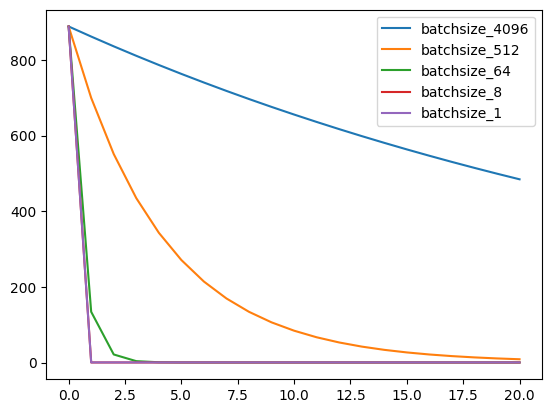

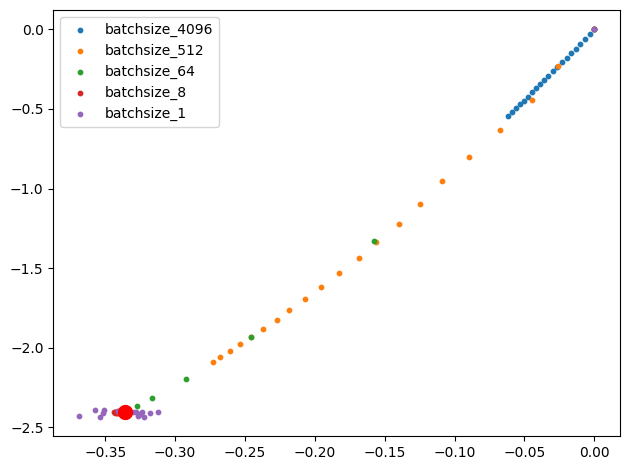

In [98]:
Param.lr = 0.001
Param.epochs = 20


phs = []
lhs = []
batchsizes = [2**12, 2**9, 64, 8, 1]
for batch_size in batchsizes:
    print('Traning with batch size:',batch_size)
    param_history, loss_history = train(w_hat, update(batch_size))
    phs.append(param_history)
    lhs.append(loss_history)   

plt.subplots()
for lh in lhs:
    plt.plot(lh)
plt.legend([f'batchsize_{bs}' for bs in batchsizes])
plt.subplots()
for ph in phs:
    plt_axis = list(zip(*np.array(ph)))
    plt.scatter(plt_axis[0],plt_axis[1],s=10)
plt.scatter(w[0],w[1],s=100,c='r')
plt.legend([f'batchsize_{bs}' for bs in batchsizes])
plt.tight_layout()
plt.show()

Multiple Gradient Descent Strategy